In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
from google.colab import files
uploaded = files.upload()


Saving Zoo.csv to Zoo (1).csv


In [7]:
df = pd.read_csv("Zoo (1).csv")
print("Dataset Loaded Successfully ✅")
df.head()


Dataset Loaded Successfully ✅


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [8]:
print("\nDataset Info:")
df.info()
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Shape:", df.shape)



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB

Missing

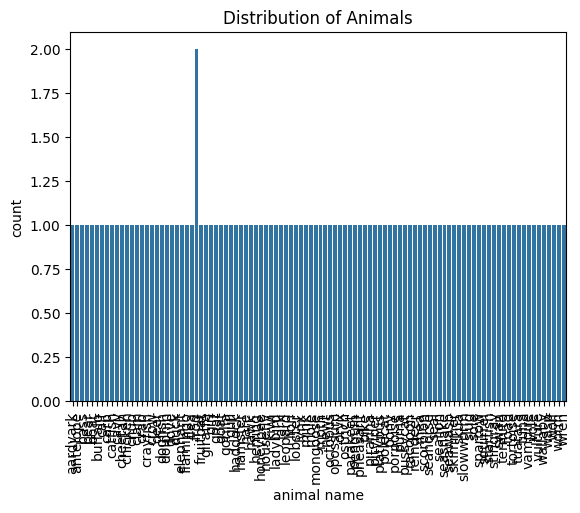

In [10]:
sns.countplot(x='animal name', data=df)
plt.title("Distribution of Animals")
plt.xticks(rotation=90)
plt.show()

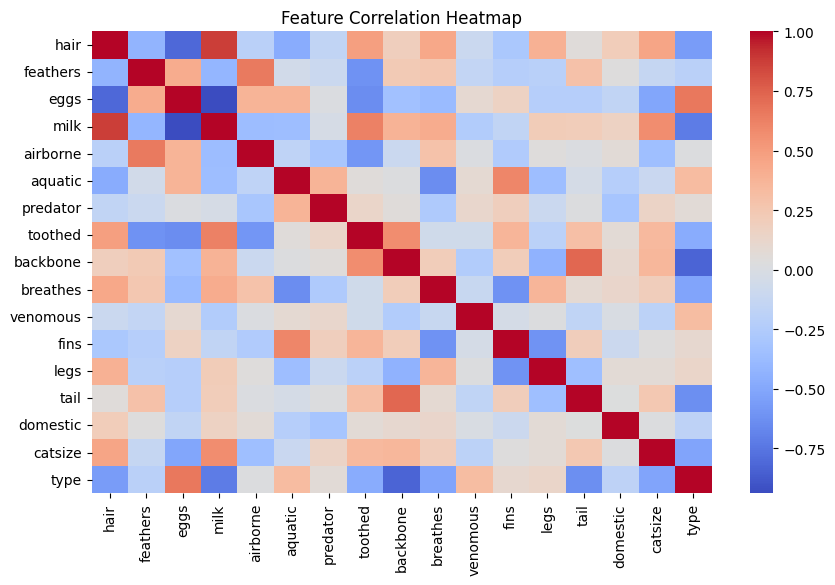

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop('animal name', axis=1).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [15]:
df = df.dropna()
X = df.drop(['animal name', 'type'], axis=1, errors='ignore')
y = df['type']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print("\nTraining samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])



Training samples: 80
Testing samples: 21


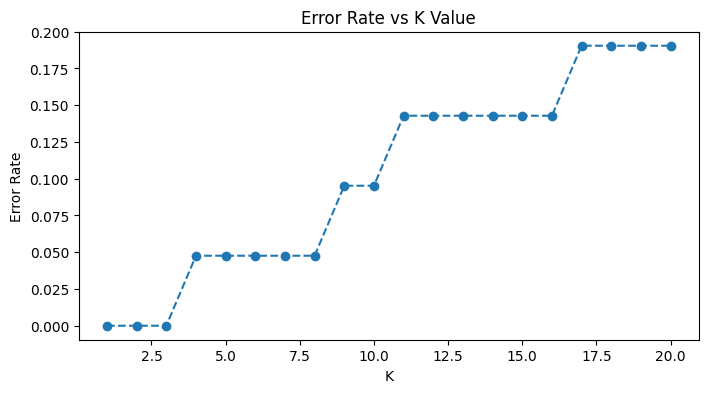

In [17]:
error_rate = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

plt.figure(figsize=(8,4))
plt.plot(range(1,21), error_rate, marker='o', linestyle='--')
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [18]:
best_k = error_rate.index(min(error_rate)) + 1
print("Best K value found:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


Best K value found: 1


In [19]:
print("\n✅ Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



✅ Model Evaluation:
Accuracy: 1.0

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



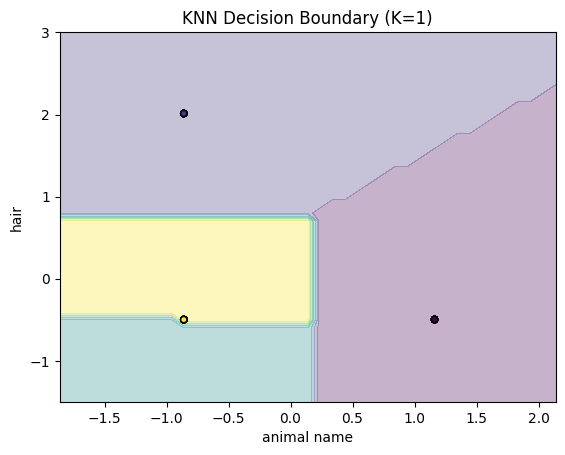

In [26]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def plot_decision_boundary(X, y, model, title):
    # Take first two features for visualization
    X_2d = X[:, :2]
    x_min, x_max = X_2d[:, 0].min() - 1, X_2d[:, 0].max() + 1
    y_min, y_max = X_2d[:, 1].min() - 1, X_2d[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Train a new KNN model specifically for 2D visualization
    knn_2d = KNeighborsClassifier(n_neighbors=model.n_neighbors)
    knn_2d.fit(X_2d, y)

    Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Define colormap based on the number of unique classes in y
    unique_classes = np.unique(y)
    # Use matplotlib.colormaps to get the viridis colormap object
    viridis_cmap = plt.colormaps['viridis']
    # Create a list of colors from the viridis colormap based on the number of unique classes
    colors = [viridis_cmap(i) for i in np.linspace(0, 1, len(unique_classes))]
    cmap = ListedColormap(colors)


    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, edgecolor='k', cmap=cmap)
    plt.title(title)
    plt.xlabel(df.columns[0]) # Use first feature name as x-label
    plt.ylabel(df.columns[1]) # Use second feature name as y-label
    plt.show()

plot_decision_boundary(X_scaled, y, knn, f"KNN Decision Boundary (K={best_k})")